In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv',encoding="latin-1")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [3]:
fields = df.columns
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
fields[df.isnull().sum() > 0]

Index(['Cuisines'], dtype='object')

<Axes: >

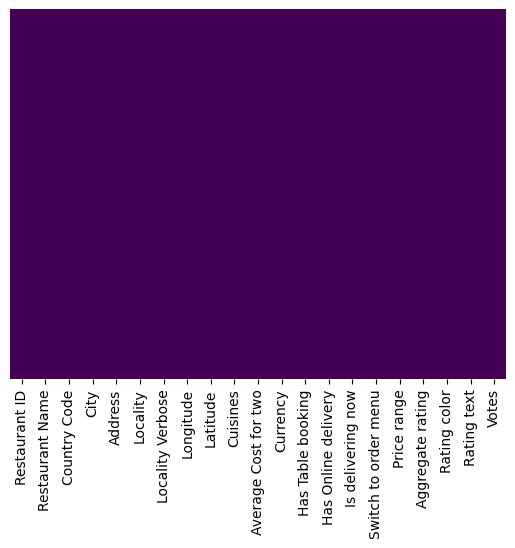

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df_cnt = pd.read_excel('Country-Code.xlsx')
df_cnt.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
# df_m = df.merge(df_cnt,how='left',left_on='Country Code',right_on='Country Code')
df = pd.merge(df,df_cnt,how='left',on='Country Code')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
df.dtypes

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

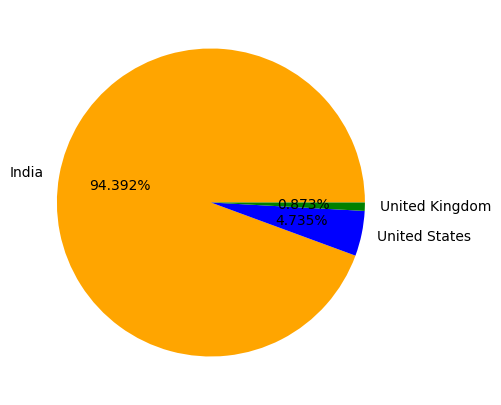

In [9]:
df.columns

country_names = df.Country.value_counts().index
country_values = df.Country.value_counts().values

plt.figure(figsize=(10,5))
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.3f%%',colors=['orange','blue','green'])
plt.show()

In [10]:
rating = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name='Count')
rating.head()

,Aggregate rating,Rating color,Rating text,Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [11]:
x = rating.groupby("Rating color").size()

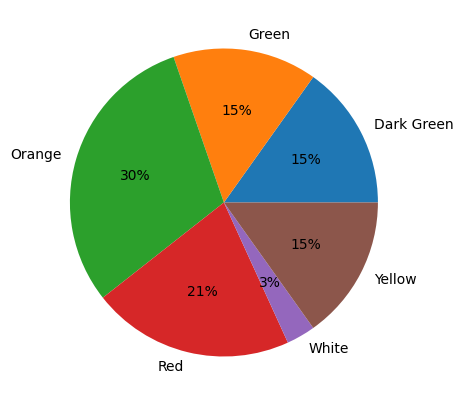

In [12]:
plt.figure(figsize=(10,5))
plt.pie(x.values,labels=x.index,autopct='%1.0f%%')
plt.show()

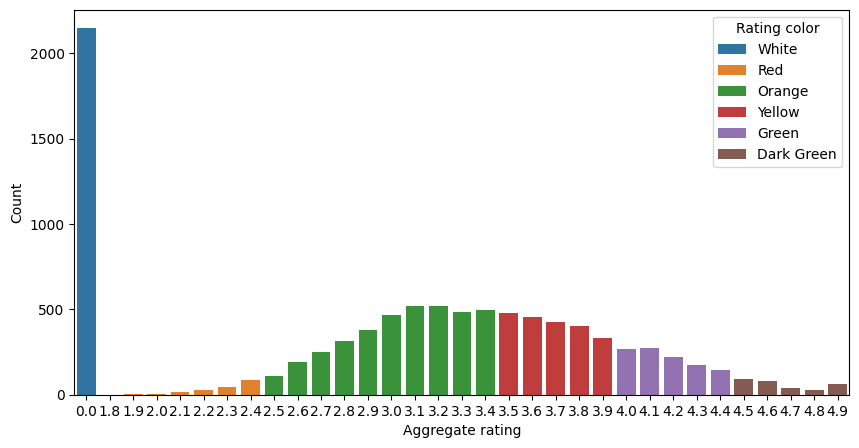

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x="Aggregate rating",y="Count",data=rating,hue="Rating color")
plt.show()

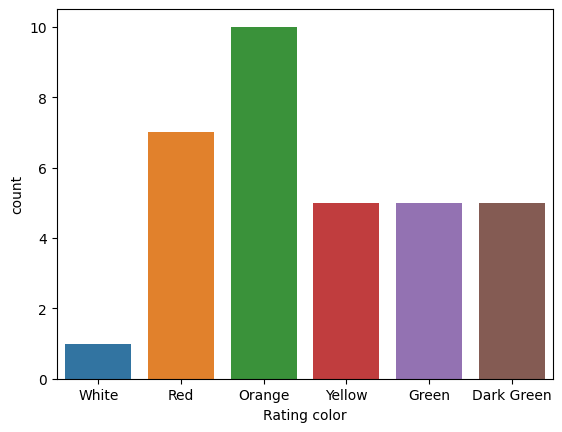

In [14]:
sns.countplot(x="Rating color",data=rating,hue="Rating color")
plt.show()

In [15]:
# countries which dont gave the ratings

df[["Country"]][df["Rating color"] == "White"].groupby("Country").size().reset_index(name="count")

,Country,count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [16]:
# Currency of each country
df[['Currency',"Country"]].groupby(['Currency',"Country"]).size().reset_index(name="count")


,Currency,Country,count
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [17]:
# which country has online delivery

df[["Country","Currency"]][df['Has Online delivery']== "Yes"].value_counts()

Country  Currency          
India    Indian Rupees(Rs.)    2423
UAE      Emirati Diram(AED)      28
Name: count, dtype: int64

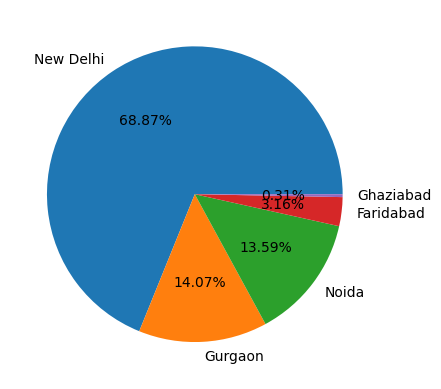

In [18]:
city_names = df["City"].value_counts().index
city_values = df["City"].value_counts().values

plt.pie(city_values[:5],labels=city_names[:5],autopct='%1.2f%%')
plt.show()

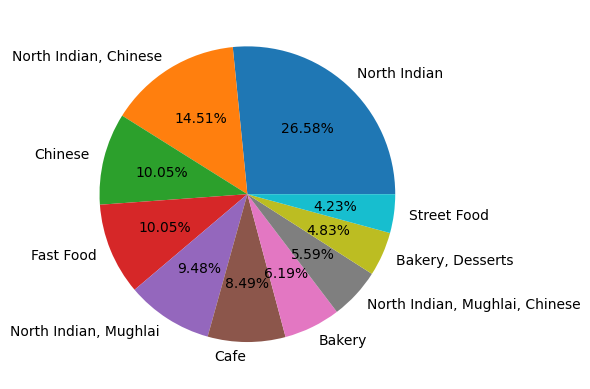

In [19]:
cus_n = df["Cuisines"].value_counts().index[:10]
cus_v = df["Cuisines"].value_counts().values[:10]

plt.pie(cus_v,labels=cus_n,autopct='%1.2f%%')
plt.show()

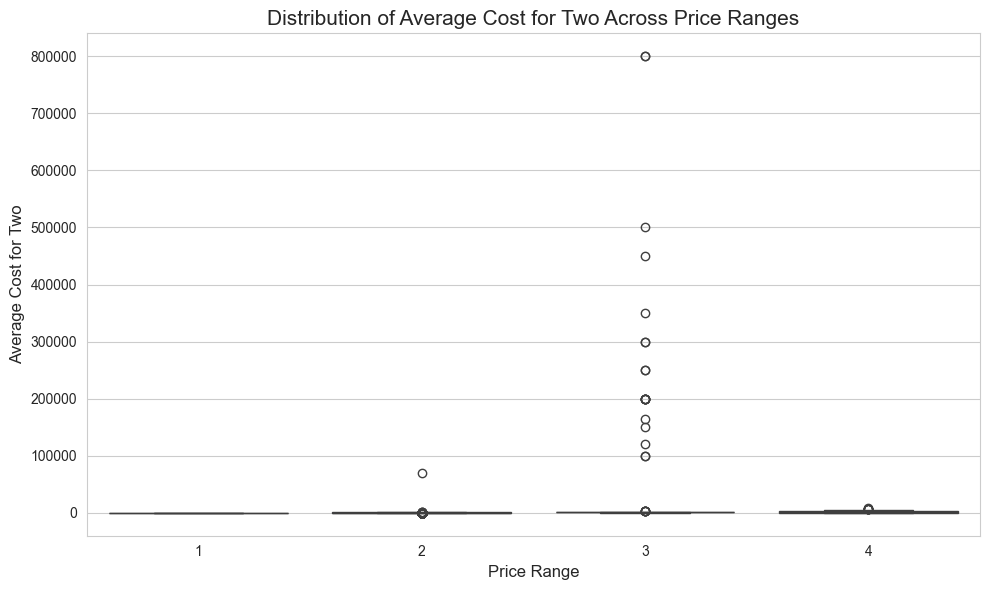

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a box plot for Average Cost for two across different Price ranges
ax = sns.boxplot(x='Price range', y='Average Cost for two', data=df)

# Improve the appearance
plt.title('Distribution of Average Cost for Two Across Price Ranges', fontsize=15)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Cost for Two', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add some details to make it more informative
plt.tight_layout()
plt.show()